<a href="https://colab.research.google.com/github/auruj/SCT_ML_2/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

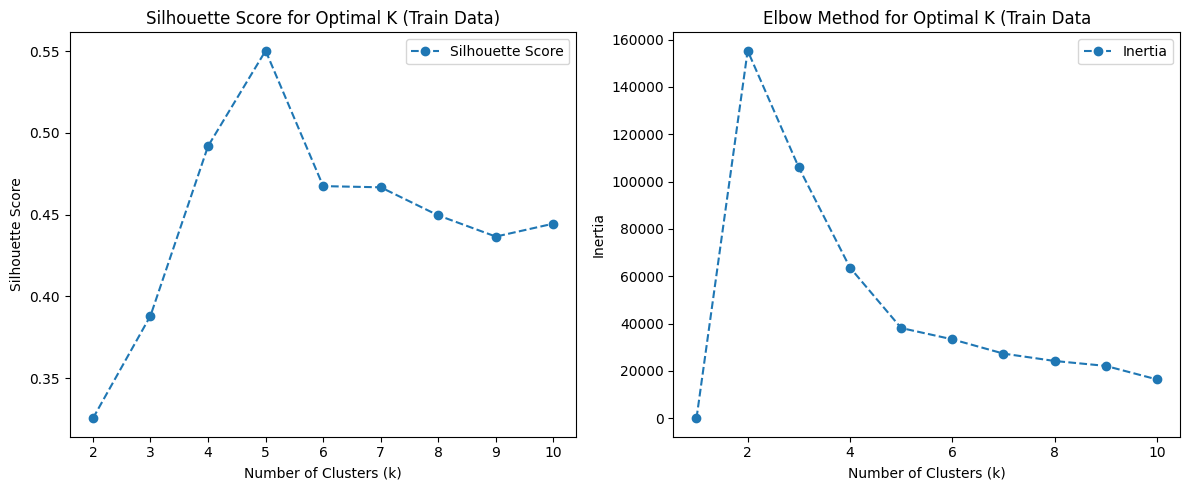

Optimal number of clusters: 5


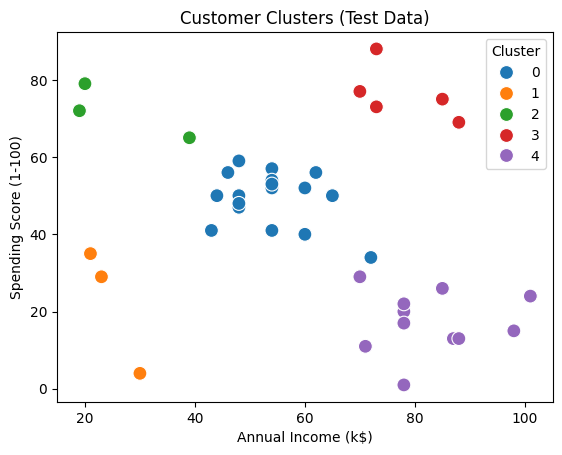

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Mall_Customers.csv")

# Select features for clustering
features = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Determine the optimal number of clusters using Silhouette Score on the training set
silhouette_scores = []
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))
    inertia.append(kmeans.inertia_)

# Plot the Silhouette Score and Inertia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--", label="Silhouette Score")
plt.title("Silhouette Score for Optimal K (Train Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), [0] + inertia, marker="o", linestyle="--", label="Inertia")
plt.title("Elbow Method for Optimal K (Train Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()

plt.tight_layout()
plt.show()

# Select optimal_k based on the highest Silhouette Score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means clustering to the training set
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train["Cluster"] = kmeans.fit_predict(X_train)

# Evaluate the clustering on the test set
X_test["Cluster"] = kmeans.predict(X_test)

# Visualize the clusters (using the test set)
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=X_test, palette="tab10", s=100
)
plt.title("Customer Clusters (Test Data)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

# Save results (optional)
#X_test.to_csv("Customer_Clusters_Test.csv", index=False)
